In [12]:
from IPython.display import Image
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython.display import display_html
display_html("""<button onclick="$('.input, .prompt, .output_stderr, .output_error').toggle();">Toggle Code</button>""", raw=True)

Toggle Code

# Adagrad

梯度下降的学习率$\eta $既不能设置的太大，也不能太小。

自适应的学习率：
1. 逐渐减小$\eta $
2. 给不同的参数不同的学习率

**Vanilla Gradient descent**
$$
w^{t+1}\leftarrow w^{t}-\eta ^{t}g^{t}
$$
**Adagrad**
$$
w^{t+1}\leftarrow w^{t}-\frac{\eta ^{t}}{\sigma ^{t}}g^{t}
$$
其中，
$$
\eta ^{t}=\frac{\eta }{\sqrt{t+1}}
$$
t为迭代次数

$$g^{t}=\frac{\partial L(\theta ^{t})}{\partial w}$$

$\sigma ^{t}$为w之前所有微分值的均方根，即$\sigma ^{t}=\sqrt{\frac{1}{t+1}\sum_{i=0}^{t}\left ( g^{i} \right )^{2}}
$
化简之后，可以得到
$$
w^{t+1}\leftarrow w^{t}-\frac{\eta }{\sum_{i=0}^{t}\left ( g^{i} \right )^{2}} g^{t}
$$


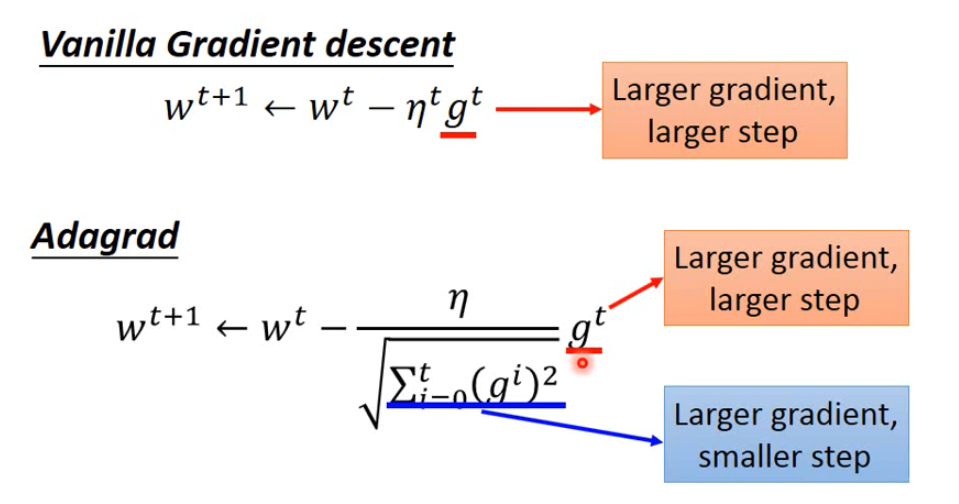

In [13]:
Image(filename = r'D:\jupyter_notebooks\Github笔记\algorithm\pictures\li3.jpg', width=500, height=200)



从上图中可以看到，Vanilla Gradient descent的做法是，梯度$g^t$越大，那么梯度下降的步幅step：$\eta^tg^t$也越大；而Adagrad的做法是：梯度$g^t$越大，梯度下降的步幅step：$\frac{\eta }{\sum_{i=0}^{t}\left ( g^{i} \right )^{2}} g^{t}$的分子越大，但分母也会越大，即分子和分母对step的影响是相反的，如何解释呢？

直观的解释是Adagrad中梯度下降的步幅step：$\frac{\eta }{\sum_{i=0}^{t}\left ( g^{i} \right )^{2}} g^{t}$反映了第t轮的梯度值与之前轮次梯度值的反差程度。如下图所示，如果之前轮次的梯度一直很小，但第t轮的梯度值很大，那么step就会很大；如果之前轮次的梯度一直很大，但第t轮的梯度值很小，那么step就会很小。。。。。（所以呢？能说明啥？）


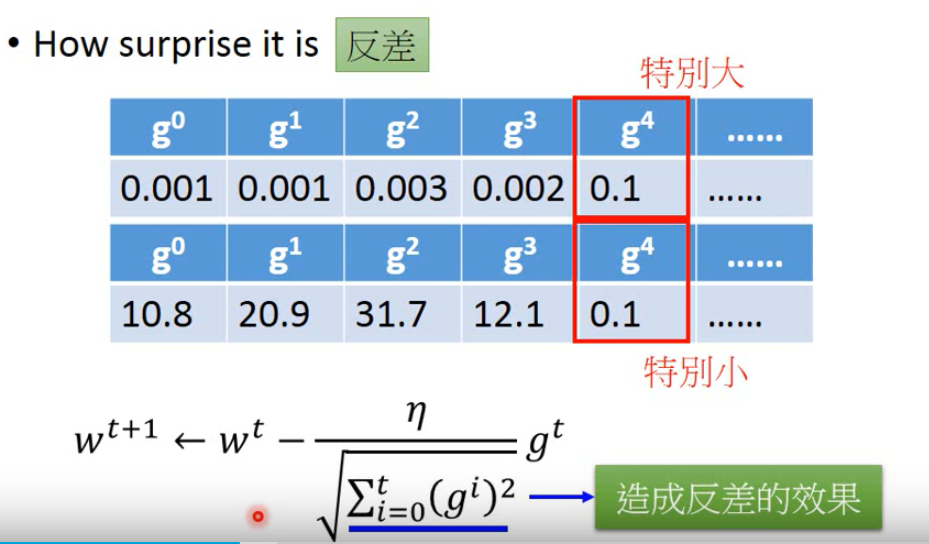

In [14]:
Image(filename = r'D:\jupyter_notebooks\Github笔记\algorithm\pictures\li4.jpg', width=500, height=200)



如下图所示，以一元二次函数为例，$x_0$处的best step为$\frac{\left | 2ax_{0}+b \right |}{2a}$，best step的分子为$\left | 2ax_{0}+b \right |$，其实是一元二次函数在$x_0$处的一阶微分；分母为$2a$，其实是一元二次函数在$x_0$处的二阶微分。也就是说，
$$
best\ step=\frac{\left | 一阶微分 \right |}{二阶微分}
$$
**（但是这只是一元二次函数的情况，一阶微分/二阶微分 这种形式具有通用性吗？）**



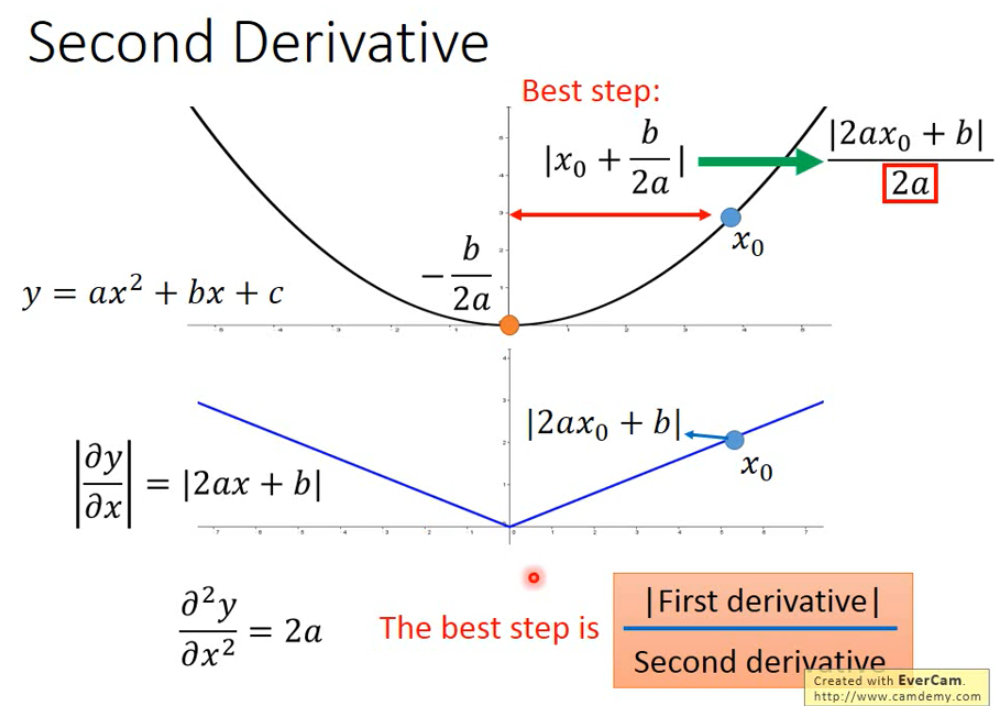

In [15]:
Image(filename = r'D:\jupyter_notebooks\Github笔记\algorithm\pictures\li5.jpg', width=500, height=200)



现在再来看Adagrad的表达式，step的分母$\sum_{i=0}^{t}\left ( g^{i} \right )^{2}$其实相当于二阶微分，原因是，如果一个函数的二阶微分很大，那么对其一阶微分进行采样，求这些点的均方根，得到的结果也会大，即下图中右图绿色的函数；如果一个函数的二阶微分小，那么对其一阶微分进行采样，求这些点的均方根，得到的结果也会较小，如下图左图蓝色函数所示。

**也就是说，参数w(之前的)所有一阶微分值的均方根可以用来表示二阶微分。**


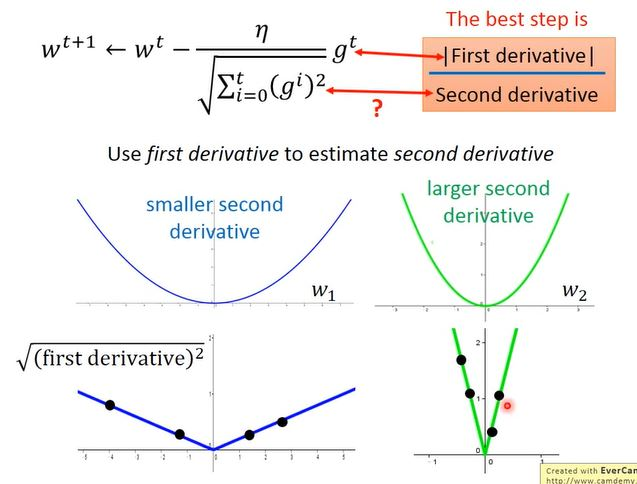

In [16]:
Image(filename = r'D:\jupyter_notebooks\Github笔记\algorithm\pictures\li6.jpg', width=500, height=200)



# 随机梯度下降

更新参数时不是用所有样本上的梯度，而是只用一个样本上的梯度来更新参数。

# Feature scaling

# 梯度下降

以后提到梯度下降，就想象成“下山”（相当于有2个参数）。

需要注意的是，每次更新参数后，损失函数不一定会下降！（跟学习率有关）

**梯度下降的本质是只考虑一阶项时的泰勒展开。** 牛顿法考虑了2阶导数。

为什么梯度下降可以使损失函数降低，因此梯度的方向是函数增长最快（一  阶导数）的方向，因此将参数朝着负梯度方向进行更新，可以使函数值降低。那么为什么梯度的方向是函数增长的方向呢，因为泰勒展开中的一阶项是+号（N阶项都是+号）。

而且由于泰勒展开的前提是$\Delta x$无限小，因此学习率$\eta$也需要无限小（即将参数限制在一个很小的范围内），才能满足泰勒展开的条件。

**就像玩红警一样，只有单位走过的地方我们才知道那里的地形高低（LOSS的大小），如果我们一步步走的话，可能只能走到局部最小点。其他没走过的地方是战争迷雾，只要开了全图作弊器，我们才知道全局最小点的位置。这就和泰勒展开一个道理，泰勒展开的前提条件是$\Delta x$无限小，也就是只能看到周围很小的区域，采用梯度下降的方式，可能只能走到局部最小点。**

**也就是说，由于梯度下降的本质是泰勒展开，那么梯度下降的问题就在于泰勒展开的前提条件是$\Delta x$无限小，所以就会造成无法得到全局最优解的问题。**